# TensorFlow CNN - Flower Classification

This notebook demonstrates data preparation and an implementation of a VGG-style CNN model for use in classifying flower images.

The dataset was sourced from Kaggle user Olga Belitskaya:
https://www.kaggle.com/datasets/olgabelitskaya/flower-color-images.

**Note that due to compute limitations I have not attempted to optimise this model!**

In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
# Dropout Regularization: To get rid of overfitting problem
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from keras import backend as K
from sklearn.model_selection import train_test_split

## Load data

In [2]:
# Path to folder with images
image_path = Path("flower_images")
images = []

In [3]:
# Iterate through flower images
for png in image_path.glob("*.png"):
    # Load image
    img = image.load_img(png)
    # Convert image to numpy array
    image_array = image.img_to_array(img)
    # Add image array to list of images
    images.append(image_array)

In [4]:
X = np.asarray(images)

In [5]:
# 1 of the 210 images (no. 208) dropped due to having dimensions (208, 208, 3)
X.shape

(209, 128, 128, 3)

In [6]:
label_data = pd.read_csv("./flower_images/flower_labels.csv")

In [7]:
label_data.shape

(210, 2)

In [8]:
label_data.tail()

,file,label
205,0206.png,6
206,0207.png,0
207,0208.png,4
208,0209.png,6
209,0210.png,1


In [9]:
label_data = label_data[label_data["file"] != "0208.png"]

In [10]:
label_data.tail()

,file,label
204,0205.png,4
205,0206.png,6
206,0207.png,0
208,0209.png,6
209,0210.png,1


In [11]:
y = label_data["label"].values

In [12]:
# Get no. unique values
unique_values, counts = np.unique(y, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}, {count}")

0, 21
1, 20
2, 19
3, 22
4, 20
5, 25
6, 23
7, 15
8, 26
9, 18


## Split train and test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)

In [14]:
X_train.shape

(167, 128, 128, 3)

In [15]:
X_test.shape

(42, 128, 128, 3)

In [16]:
y_train.shape

(167,)

In [17]:
y_test.shape

(42,)

In [18]:
# 10 different digits
num_classes = 10
# Image dimensions
img_rows, img_cols = 128, 128

In [19]:
input_shape = (img_rows, img_cols, 3)

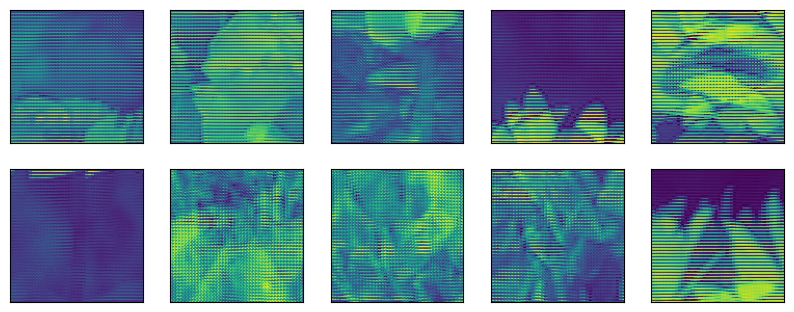

In [20]:
# Reshape data to view images
X_train_reshape = X_train.reshape(-1,128,128)
X_test_reshape = X_test.reshape(-1,128,128)
# Preview images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_reshape[i])
plt.show()

## Transform data

In [21]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

In [22]:
# Convert data types for train and test data
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [23]:
print(X_train[0])

[[[146. 145. 148.]
  [146. 146. 147.]
  [146. 146. 148.]
  ...
  [ 31.  49.  23.]
  [ 26.  39.  19.]
  [ 21.  33.  18.]]

 [[146. 146. 147.]
  [147. 146. 150.]
  [147. 146. 151.]
  ...
  [ 34.  53.  26.]
  [ 29.  46.  21.]
  [ 25.  38.  19.]]

 [[146. 146. 147.]
  [147. 146. 149.]
  [147. 146. 149.]
  ...
  [ 33.  53.  26.]
  [ 31.  49.  22.]
  [ 27.  42.  20.]]

 ...

 [[ 85.  82.  62.]
  [ 83.  82.  61.]
  [ 81.  79.  57.]
  ...
  [ 75.  79.  53.]
  [ 86.  81.  62.]
  [ 70.  70.  47.]]

 [[ 92.  85.  70.]
  [ 91.  85.  67.]
  [ 91.  85.  65.]
  ...
  [ 72.  78.  51.]
  [ 78.  77.  55.]
  [ 63.  64.  44.]]

 [[ 98.  85.  74.]
  [ 99.  87.  72.]
  [ 96.  88.  69.]
  ...
  [ 70.  75.  50.]
  [ 67.  68.  49.]
  [ 53.  55.  39.]]]


In [24]:
# Scale train and test data
X_train /= 255.
X_test /= 255.

In [25]:
print(X_train[0])

[[[0.57254905 0.5686275  0.5803922 ]
  [0.57254905 0.57254905 0.5764706 ]
  [0.57254905 0.57254905 0.5803922 ]
  ...
  [0.12156863 0.19215687 0.09019608]
  [0.10196079 0.15294118 0.07450981]
  [0.08235294 0.12941177 0.07058824]]

 [[0.57254905 0.57254905 0.5764706 ]
  [0.5764706  0.57254905 0.5882353 ]
  [0.5764706  0.57254905 0.5921569 ]
  ...
  [0.13333334 0.20784314 0.10196079]
  [0.11372549 0.18039216 0.08235294]
  [0.09803922 0.14901961 0.07450981]]

 [[0.57254905 0.57254905 0.5764706 ]
  [0.5764706  0.57254905 0.58431375]
  [0.5764706  0.57254905 0.58431375]
  ...
  [0.12941177 0.20784314 0.10196079]
  [0.12156863 0.19215687 0.08627451]
  [0.10588235 0.16470589 0.07843138]]

 ...

 [[0.33333334 0.32156864 0.24313726]
  [0.3254902  0.32156864 0.23921569]
  [0.31764707 0.30980393 0.22352941]
  ...
  [0.29411766 0.30980393 0.20784314]
  [0.3372549  0.31764707 0.24313726]
  [0.27450982 0.27450982 0.18431373]]

 [[0.36078432 0.33333334 0.27450982]
  [0.35686275 0.33333334 0.2627451 ]


In [26]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

X_train shape: (167, 128, 128, 3)
X_test shape:  (42, 128, 128, 3)


In [27]:
# Convert labels (0 to 9) to binary class matrices with one-hot encoding
# e.g. 9 => 0 0 0 0 0 0 0 0 0 1 and 3 => 0 0 0 1 0 0 0 0 0 0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [28]:
# Verify one-hot encoding
print(y_train[0:4])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


## Prepare model for training

In [29]:
# Initialise the model
model = Sequential()

In [30]:
num_classes

10

In [31]:
input_shape

(128, 128, 3)

### Set architecture

In [32]:
# Create CNN to classify images
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same", input_shape=input_shape))
model.add(LeakyReLU(alpha=0.02))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model.add(LeakyReLU(alpha=0.02))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Second convolution block
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# Third convolution block
# model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
# model.add(BatchNormalization())
# model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_initializer="he_uniform", padding="same"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
# Classification block
model.add(Flatten())
model.add(Dense(512, activation="relu", kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

### Compile the CNN

In [33]:
# Define compile to minimise categorical loss, use ada delta optimized, and optimize to maXimizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

## Train the model

In [34]:
batch_size = 32
epochs = 10

In [35]:
# Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
6/6 [==============================] - 193s 31s/step - loss: 4.1838 - accuracy: 0.0958 - val_loss: 24.5279 - val_accuracy: 0.0952
Epoch 2/10
6/6 [==============================] - 195s 32s/step - loss: 1.3961 - accuracy: 0.5269 - val_loss: 18.8746 - val_accuracy: 0.0952
Epoch 3/10
6/6 [==============================] - 191s 32s/step - loss: 0.8935 - accuracy: 0.6946 - val_loss: 15.5059 - val_accuracy: 0.1190
Epoch 4/10
6/6 [==============================] - 197s 33s/step - loss: 0.9108 - accuracy: 0.6826 - val_loss: 27.9828 - val_accuracy: 0.0952
Epoch 5/10
6/6 [==============================] - 189s 31s/step - loss: 0.6515 - accuracy: 0.8204 - val_loss: 26.3137 - val_accuracy: 0.0952
Epoch 6/10
6/6 [==============================] - 208s 35s/step - loss: 0.5457 - accuracy: 0.8204 - val_loss: 16.4880 - val_accuracy: 0.1190
Epoch 7/10
6/6 [==============================] - 209s 34s/step - loss: 0.5225 - accuracy: 0.8443 - val_loss: 12.4797 - val_accuracy: 0.1190
Epoch 8/10
6/

In [37]:
# Evaluate model with test data to get scores on "real" data
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss:      {score[0]:.2f}")
print(f"Test accuracy: {score[1]:.2%}")

Test loss:      7.23
Test accuracy: 11.90%
